In [50]:
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기', bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기 (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


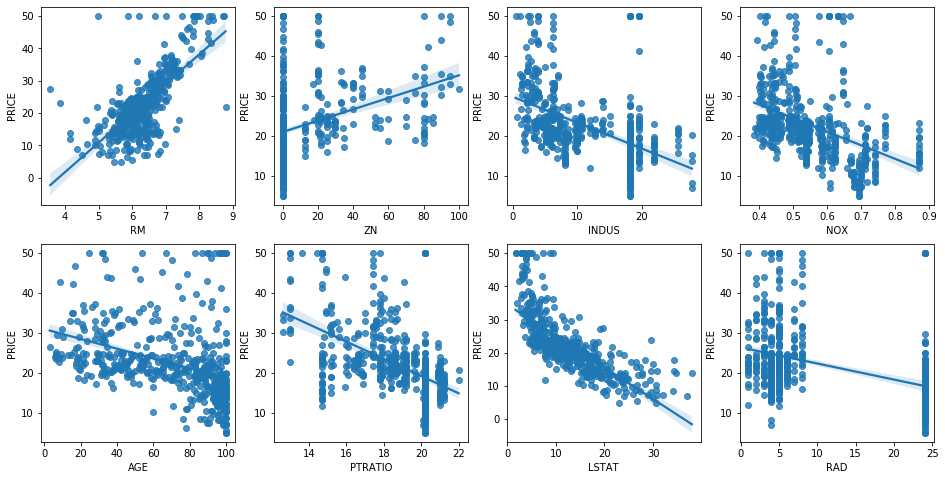

In [24]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                   random_state = 156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.4f}, RMSE: {1:.4f}'.format(mse, rmse))
print('Variance Score: {0:.4f}'.format(r2_score(y_test, y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

MSE: 17.2969, RMSE: 4.1590
Variance Score: 0.7572
절편 값: 40.995595172164336
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [64]:
#회귀계수가 큰 값 순으로 정렬
coeff = pd.Series(data=np.round(lr.coef_, 1), index=boston.feature_names)
coeff.sort_values(ascending=False)

#교차 검증으로 오차 비용 계산
from sklearn.model_selection import cross_val_score

#폴드 수 5, mse, rmse 계산
#lr = LinearRegression()
#lr.fit(X_train, y_train) #이미 위에서 함
neg_mean_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 negative MSE scores:', np.round(neg_mean_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE scores:', np.round(avg_rmse, 2))

5 folds의 개별 negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE scores: 5.83


In [68]:
#여러 알파 값에 대한 평균 RMSE 값
from sklearn.linear_model import Ridge

alphas = [0, 0.1, 1, 10, 100]
for alp in alphas:
    ridge = Ridge(alpha = alp)
    neg_mean_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mean_scores)
    avg_rmse = np.mean(rmse_scores)

    print('5 folds의 평균 RMSE scores:', np.round(avg_rmse, 2))

5 folds의 평균 RMSE scores: 5.83
5 folds의 평균 RMSE scores: 5.79
5 folds의 평균 RMSE scores: 5.65
5 folds의 평균 RMSE scores: 5.52
5 folds의 평균 RMSE scores: 5.33


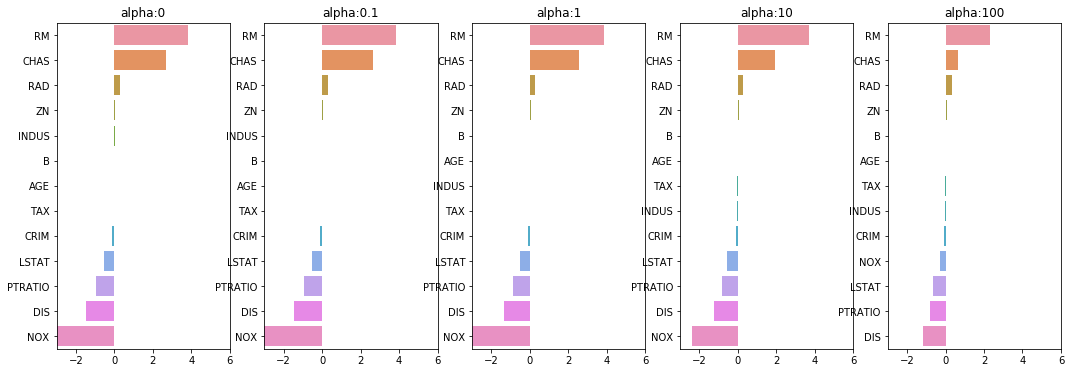

In [73]:
#alpha 값에 따라 13 특성의 계수의 변화율 (크기를 줄이는)
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alp in enumerate(alphas):
    ridge = Ridge(alpha = alp)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    
    colname = 'alpha:' + str(alp)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [79]:
ridge_alphas = alphas.copy()
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [80]:
#엘라스틱 넷
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

#엘라스틱넷 회귀 
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


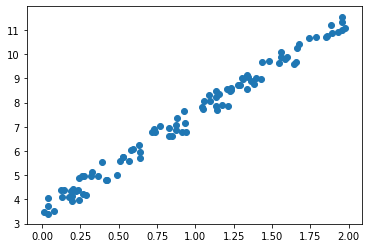

In [58]:
####경사하강법을 사용해서 비용이 최소가 되는 단순 선형회귀의 두 계숫값 찾기####

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100,1) #샘플 데이터 feature 생성
#y = 4X + 6 + e(노이즈)
y = 3 + 4*X + np.random.rand(100,1)

plt.scatter(X,y)
plt.show()

w1:4.0283 w0:6.4905
Gradient Descent Total Cost: 0.0775


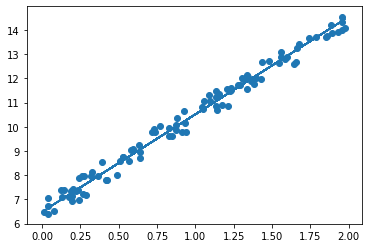

In [47]:
#경사하강법을 사용해서 비용함수가 최소가 되는 선형관계의 식을 찾아 시각화
#w1과 s0를 업데이트할 w1_update, w0_update를 반환

def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    return w1_update, w0_update

def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        #print('w1:{0:.4f} w0:{1:.4f}'.format(w1[0,0], w0[0,0]))
    return w1, w0

#오차 비용 계산 - RMSE(실제 - 예측값) 제곱 합의 평균에 루트를 씌운 것
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.4f} w0:{1:.4f}'.format(w1[0,0], w0[0,0]))

y_pred = w1[0,0] * X + w0[0,0]
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

plt.scatter(X,y)
plt.plot(X, y_pred)
plt.show()

In [81]:
############## 로지스틱 회귀 분류 ##############
#1. 유방암 데이터 로드
#2. 특성을 표준화
#3. 학습, 테스트 데이터 분리
#4. 로지스틱 회귀 알고리즘 객체 생성
#5. 학습
#6. 테스트 데이터로 예측
#7. 평가 (정확도와 ROC_AUD 출력)
#8. GridSearchCV 사용해서 최적의 하이퍼 파라미터 찾아 출력,
# 8+ 최적의 하이퍼 파라미터일 때의 정확도도 출력

In [19]:
params = {'penalty': ['l2'],#, 'l1'],
         'C': [0.01, 0.1, 1, 5, 10]} #찾아볼 하이퍼 파라미터 목록

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#1
bc = load_breast_cancer()
features, target = bc.data, bc.target

#ratio_01 = pd.DataFrame(target).value_counts()
#value_counts() 는 데이터프레임에 적용 불가

#2
scaler = StandardScaler()
features_stdized = scaler.fit_transform(features)

#3
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=0)

#4
lr = LogisticRegression(random_state = 0, max_iter=7000) #큰 값의 max_iter 필요..

#5
lr.fit(train_X, train_y)

#6
pred = lr.predict(test_X)

#7
accuracy = accuracy_score(test_y, pred)
roc_auc = roc_auc_score(test_y, pred)
print('accuracy: {0:0.4f}'.format(accuracy))
print('ROC_AUC: {0:0.4f}'.format(roc_auc))

#8
grid_dclf = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5)
grid_dclf.fit(train_X, train_y)
print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)

#8+
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

accuracy: 0.9474
ROC_AUC: 0.9520
GridSearchCV 최적 하이퍼 파라미터: {'C': 10, 'penalty': 'l2'}
GridSearchCV 최고 정확도: 0.9582


In [ ]:
#ValueError: Logistic Regression supports only penalties in ['l1', 'l2'], got none. 뜨면
#conda install scikit-learn=0.21.2 사이킷런 업데이트 필요하다고 함